In [2]:
# Import necessary libraries
from qiskit.circuit.library import PauliFeatureMap
import numpy as np
from qiskit_aer import AerSimulator
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 

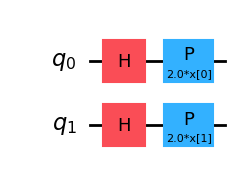

In [4]:


# Define the feature vector we want to encode
# For example, let x = [π/2, π/4] to see how two features would be encoded
feature_vector = np.array([np.pi / 2, np.pi / 4])

# Create a PauliFeatureMap with two qubits
# Each feature will be encoded using Pauli-Z rotations with entanglement between qubits
pauli_feature_map = PauliFeatureMap(
    feature_dimension=2,          # Number of features to encode
    reps=1,                       # Number of times to repeat the encoding
    paulis=['Z']                  # Using only Z rotations in this example
)

# Draw the circuit to visualize it
pauli_feature_map.decompose().draw('mpl')

In [10]:
# Bell Circuit
qc = PauliFeatureMap(
    feature_dimension=1,          # Number of features to encode
    reps=1,                       # Number of times to repeat the encoding
    paulis=['Z']                  # Using only Z rotations in this example
)
qc.measure_all()
qc = qc.assign_parameters([0.1])
 
# Run the sampler job locally using AerSimulator.
# Session syntax is supported but ignored because local mode doesn't support sessions.
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_qc = pm.run(qc)
with Session(backend=aer_sim) as session:
    sampler = SamplerV2(mode=session)
    result = sampler.run([isa_qc]).result()

print(result[0].data.meas.get_counts())

{'1': 501, '0': 523}


{'01': 249, '00': 253, '10': 264, '11': 258}


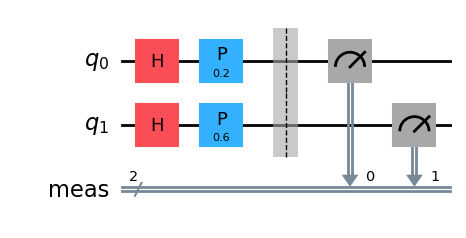

In [14]:
 # Bell Circuit
qc = PauliFeatureMap(
    feature_dimension=2,          # Number of features to encode
    reps=1,                       # Number of times to repeat the encoding
    paulis=['Z']                  # Using only Z rotations in this example
)
qc.measure_all()
qc = qc.assign_parameters([0.1, 0.3])

 
# Run the sampler job locally using AerSimulator.
# Session syntax is supported but ignored because local mode doesn't support sessions.
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_qc = pm.run(qc)
with Session(backend=aer_sim) as session:
    sampler = SamplerV2(mode=session)
    result = sampler.run([isa_qc]).result()

print(result[0].data.meas.get_counts())
qc.decompose().draw('mpl')

{'11': 235, '01': 275, '10': 260, '00': 254}


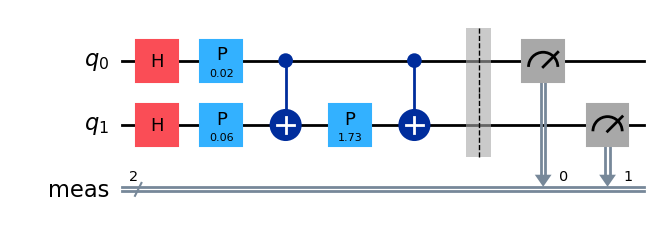

In [15]:
# Bell Circuit
qc = PauliFeatureMap(
    alpha=0.2,
    feature_dimension=2,          # Number of features to encode
    reps=1,                       # Number of times to repeat the encoding
    paulis=['Z', 'ZZ']                  # Using only Z rotations in this example
)
qc.measure_all()
qc = qc.assign_parameters([0.1, 0.3])

 
# Run the sampler job locally using AerSimulator.
# Session syntax is supported but ignored because local mode doesn't support sessions.
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_qc = pm.run(qc)
with Session(backend=aer_sim) as session:
    sampler = SamplerV2(mode=session)
    result = sampler.run([isa_qc]).result()

print(result[0].data.meas.get_counts())
qc.decompose().draw('mpl')

{'00': 1024}


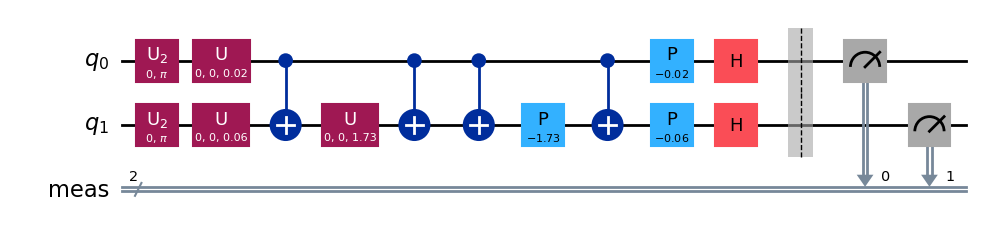

In [16]:
# Bell Circuit
qc = PauliFeatureMap(
    alpha=0.2,
    feature_dimension=2,          # Number of features to encode
    reps=1,                       # Number of times to repeat the encoding
    paulis=['Z', 'ZZ']                  # Using only Z rotations in this example
)
inv_qc = qc.inverse()
qc.append(inv_qc, [0, 1])
qc.measure_all()
qc = qc.assign_parameters([0.1, 0.3])

 
# Run the sampler job locally using AerSimulator.
# Session syntax is supported but ignored because local mode doesn't support sessions.
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_qc = pm.run(qc)
with Session(backend=aer_sim) as session:
    sampler = SamplerV2(mode=session)
    result = sampler.run([isa_qc]).result()

print(result[0].data.meas.get_counts())
qc.decompose().decompose().draw('mpl')


{'00': 676, '11': 318, '10': 16, '01': 14} => 676


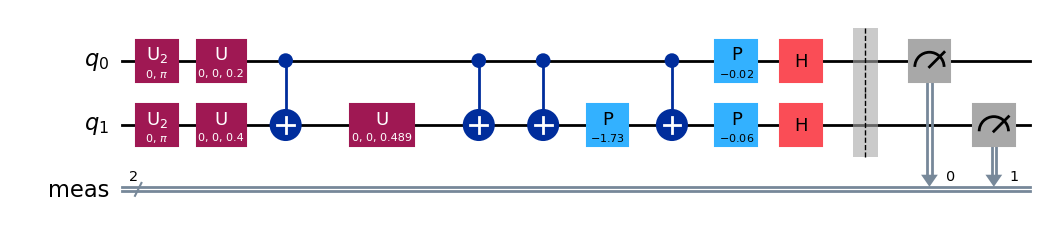

In [17]:
# Bell Circuit
qc = PauliFeatureMap(
    alpha=0.2,
    feature_dimension=2,          # Number of features to encode
    reps=1,                       # Number of times to repeat the encoding
    paulis=['Z', 'ZZ'],                  # Using only Z rotations in this example
)

inv_qc = PauliFeatureMap(
    alpha=0.2,
    feature_dimension=2,          # Number of features to encode
    reps=1,                       # Number of times to repeat the encoding
    paulis=['Z', 'ZZ'],                  # Using only Z rotations in this example
    parameter_prefix='j'
).inverse()

qc.append(inv_qc, [0, 1])
qc.measure_all()
qc = qc.assign_parameters([0.1, 0.3, 1, 2])

 
# Run the sampler job locally using AerSimulator.
# Session syntax is supported but ignored because local mode doesn't support sessions.
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_qc = pm.run(qc)
with Session(backend=aer_sim) as session:
    sampler = SamplerV2(mode=session)
    result = sampler.run([isa_qc]).result()

print(result[0].data.meas.get_counts(), "=>", result[0].data.meas.get_counts()['00'])
qc.decompose().decompose().draw('mpl')

{'00': 872, '01': 41, '11': 63, '10': 48} => 872


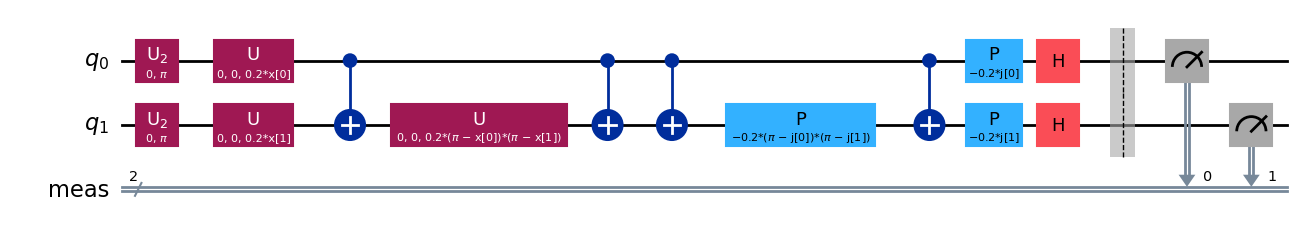

In [18]:
# Bell Circuit
qc = PauliFeatureMap(
    alpha=0.2,
    feature_dimension=2,          # Number of features to encode
    reps=1,                       # Number of times to repeat the encoding
    paulis=['Z', 'ZZ'],                  # Using only Z rotations in this example
)

inv_qc = PauliFeatureMap(
    alpha=0.2,
    feature_dimension=2,          # Number of features to encode
    reps=1,                       # Number of times to repeat the encoding
    paulis=['Z', 'ZZ'],                  # Using only Z rotations in this example
    parameter_prefix='j'
).inverse()

qc.append(inv_qc, [0, 1])
qc.measure_all()
# qc = qc.assign_parameters([0.1, 0.3, 1, 2])

 
# Run the sampler job locally using AerSimulator.
# Session syntax is supported but ignored because local mode doesn't support sessions.
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_qc = pm.run(qc)
with Session(backend=aer_sim) as session:
    sampler = SamplerV2(mode=session)
    result = sampler.run([(isa_qc, np.array([1, 2, 3, 4]))]).result()

print(result[0].data.meas.get_counts(), "=>", result[0].data.meas.get_counts()['00'])
qc.decompose().decompose().draw('mpl')